### Linear Regression in Tensorflow

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
x_data = np.random.randn(2000,1)
w_real = np.array([0.3]).reshape(1,1)
b_real = np.array([-0.2]).reshape(1,1)
noise = np.random.randn(2000,1)*0.1
wxb = (np.matmul(x_data,w_real) + b_real)
y_data = (np.matmul(x_data,w_real) + b_real) + noise

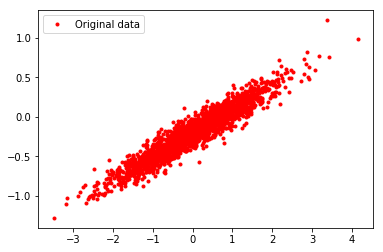

In [57]:
plt.figure(figsize=(6,4))
plt.plot(x_data, y_data, 'r.', label='Original data')
plt.legend()
plt.show()

Step#  0 , Cost: 0.665896 , Weights:  -0.409855 , Biases:  0.164188
Step#  5 , Cost: 0.0745155 , Weights:  0.077515 , Biases:  -0.0827893
Step#  10 , Cost: 0.0165321 , Weights:  0.228658 , Biases:  -0.162959
Optimization steps complete at #  15 , Cost: 0.0112051 , MSE:  22.4103 , Weights:  0.269967 , Biases:  -0.185834


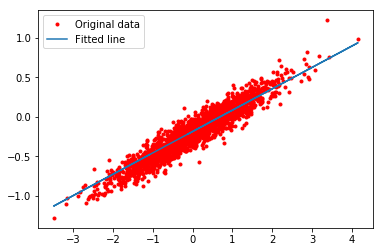

In [60]:
### NUM_STEPS = 15
g = tf.Graph()

with g.as_default():
    X = tf.placeholder(tf.float32,shape=[None,1])
    Y = tf.placeholder(tf.float32,shape=None)
    learning_rate = tf.placeholder(tf.float32,shape=None)
    
    with tf.name_scope('coefficients') as scope:
        W = tf.Variable(np.random.randn(),dtype=tf.float32,name='weights')
        b = tf.Variable(np.random.randn(),dtype=tf.float32,name='bias')
        Y_pred = tf.add(tf.multiply(X, W), b)

    with tf.name_scope('cost') as scope:
        cost = tf.reduce_mean(tf.square(Y-Y_pred))
    
    with tf.name_scope('accuracy') as scope:
        accuracy = tf.reduce_sum(tf.square(Y-Y_pred))
        
    with tf.name_scope('train') as scope:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for step in range(NUM_STEPS):
            sess.run(optimizer,feed_dict={X: x_data, Y: y_data, learning_rate: 0.1})
            if (step % 5 == 0):
                c = sess.run(cost,feed_dict={X: x_data, Y: y_data})
                print("Step# ",step,", Cost:",c,", Weights: ",sess.run(W),", Biases: ",sess.run(b))
        c = sess.run(cost,feed_dict={X: x_data, Y: y_data})
        a = sess.run(accuracy,feed_dict={X: x_data, Y: y_data})
        print("Optimization steps complete at # ",NUM_STEPS,", Cost:", c,", MSE: ", a,", Weights: ",sess.run(W),", Biases: ",sess.run(b))
        plt.plot(x_data, y_data, 'r.', label='Original data')
        plt.plot(x_data, x_data * np.array(sess.run(W))+sess.run(b),label='Fitted line')
        plt.legend()
        plt.show()